# 오퍼스원 Symtom Check 예제

## 패키지 세팅

In [43]:
from sklearn import tree
import pandas as pd
import numpy as np
import graphviz as gv

## 전처리

In [44]:
disease = pd.read_csv("./datas/disease.csv")
disease.head()
x = disease.dropna().drop(['Id','Disease_Name','Disease_Id'],axis=1,inplace=False)
y = disease['Disease_Id']
y_name = disease['Disease_Name']
x_name = pd.Series(np.array(['복통','목아픔','기침','피로','발열','근육통','설사','두통']))

In [45]:
disease

,Id,Disease_Id,Disease_Name,Abdominal_Pain,Sore_Throat,Cough,Fatigue,Fever,Muscle_Pain,Diarrhea,Headache
0,1,1,감기,0,1,1,1,0,0,0,1
1,2,2,대장염,1,0,0,0,0,0,1,0
2,3,3,횡문근융해증,0,0,0,0,0,1,0,0
3,4,4,위염,1,0,0,0,0,0,0,0
4,5,5,뇌수막염,0,0,1,0,1,0,0,1
5,6,6,우울증,0,0,0,0,0,0,0,1
6,7,7,만성피로,0,0,0,1,0,0,0,0
7,8,8,코로나,0,1,1,0,1,0,0,1


In [46]:
x

,Abdominal_Pain,Sore_Throat,Cough,Fatigue,Fever,Muscle_Pain,Diarrhea,Headache
0,0,1,1,1,0,0,0,1
1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1
5,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,0
7,0,1,1,0,1,0,0,1


In [47]:
y

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
Name: Disease_Id, dtype: int64

In [48]:
y_name

0        감기
1       대장염
2    횡문근융해증
3        위염
4      뇌수막염
5       우울증
6      만성피로
7       코로나
Name: Disease_Name, dtype: object

In [49]:
x_name

0     복통
1    목아픔
2     기침
3     피로
4     발열
5    근육통
6     설사
7     두통
dtype: object

In [50]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

# 모델 시각화

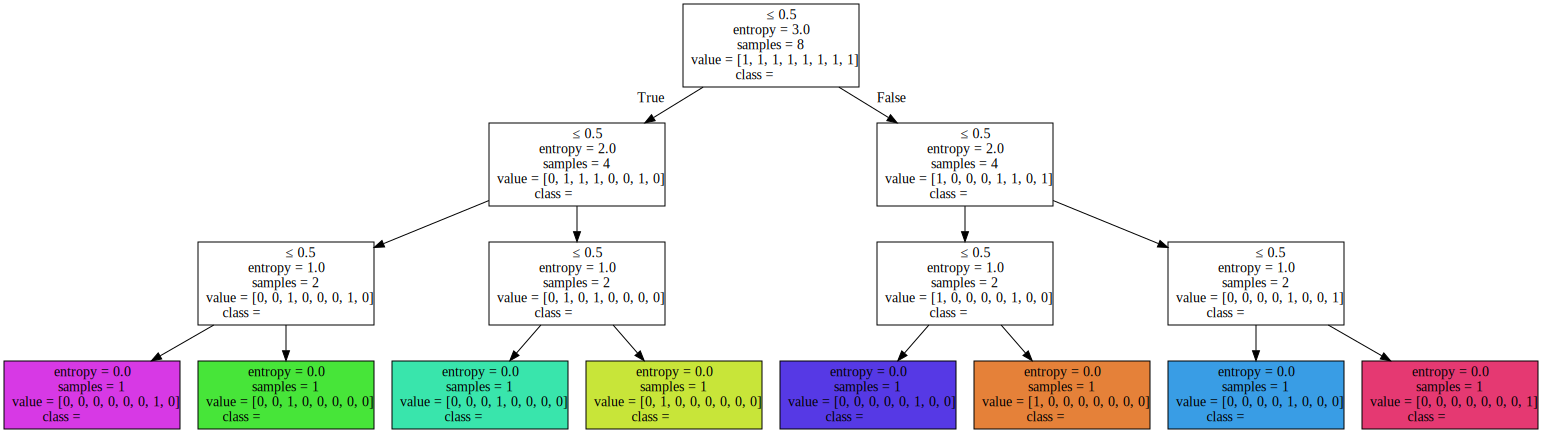

In [51]:
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names= x_name,
    class_names= y_name,
    filled=True,
    rounded=False,
    special_characters=True
)
graph = gv.Source(dot_data)
graph


